#### Outline
1. check data 
2. clean data 
3. data visualization
   * 3.1 Explore data (not about avg salary)
   * 3.2 features VS salary

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from IPython.display import display

### 1. Check Data

In [2]:
pd.set_option('display.max_columns',50)
df = pd.read_csv('data_cleaned_2021.csv',index_col=0)

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 955
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           742 non-null    object 
 1   Salary Estimate     742 non-null    object 
 2   Job Description     742 non-null    object 
 3   Rating              742 non-null    float64
 4   Company Name        742 non-null    object 
 5   Location            742 non-null    object 
 6   Headquarters        742 non-null    object 
 7   Size                742 non-null    object 
 8   Founded             742 non-null    int64  
 9   Type of ownership   742 non-null    object 
 10  Industry            742 non-null    object 
 11  Sector              742 non-null    object 
 12  Revenue             742 non-null    object 
 13  Competitors         742 non-null    object 
 14  Hourly              742 non-null    int64  
 15  Employer provided   742 non-null    int64  
 16  Lower Sa

check null data

<AxesSubplot:ylabel='index'>

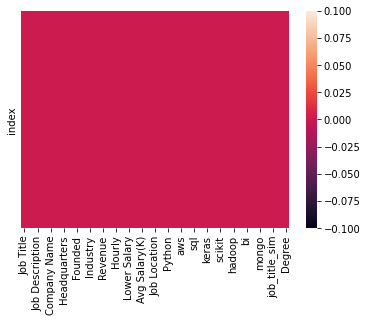

In [5]:
sns.heatmap(df.isnull(),yticklabels=False)

---

### 2 . Clean Data

Extract average salary from column ['Salary Estimate']

In [6]:
list_to_clean = ['$','K','(Glassdoor est.)',' ','EmployerProvidedSalary:','PerHour','(Employerest.)']
def clean_salary(salary):
    for text in list_to_clean:
        salary = salary.replace(text,'')
    return salary
df['all_salary'] = df['Salary Estimate'].apply(clean_salary)

In [7]:
df['min_salary'] = df['all_salary'].apply(lambda x : x.split('-')[0]).astype('int')
df['max_salary'] = df['all_salary'].apply(lambda x : x.split('-')[1]).astype('int')
df['avg_salary (K)'] = (df['min_salary'] + df['max_salary'])*0.5
df['avg_salary (K)'].head()

index
0     72.0
1     87.5
2     85.0
3     76.5
4    114.5
Name: avg_salary (K), dtype: float64

drop columns not use

In [8]:
df = df.drop(labels=['Job Description','Founded','Industry','Company Name','Location','Headquarters','Competitors','Hourly','Employer provided',
                     'company_txt','seniority_by_title','Degree','Lower Salary','Upper Salary','Avg Salary(K)'],axis=1)

explore category in each column.

In [9]:
df['Type of ownership'].value_counts()

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  5
School / School District            2
Name: Type of ownership, dtype: int64

In [10]:
df['job_title_sim'].value_counts()

data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

In [11]:
df['Sector'].value_counts()

Information Technology                180
Biotech & Pharmaceuticals             112
Business Services                      97
Insurance                              69
Health Care                            49
Finance                                42
Manufacturing                          34
Aerospace & Defense                    25
Education                              23
Retail                                 15
Oil, Gas, Energy & Utilities           14
Government                             11
-1                                     10
Non-Profit                              9
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Media                                   6
Arts, Entertainment & Recreation        4
Consumer Services                       4
Mining & Metals                         3
Construction, Repair & Maintenance      3
Agriculture & Forestry            

In [12]:
df['Size'].value_counts()

1001 - 5000      150
501 - 1000       134
10000+           130
201 - 500        117
51 - 200          94
5001 - 10000      76
1 - 50            31
unknown           10
Name: Size, dtype: int64

- พบว่าบาง column มี category บางอันมีจำนวนข้อมูลน้อยเกินไป ทำให้ข้อมูลอาจไม่เพียงพอในการคำนวณ salary X category นั้น จึงทำการ drop ข้อมูลบางส่วน

In [13]:
# จำนวนข้อมูลก่อน drop 
len(df)

742

In [14]:
Size_use = df['Size'].value_counts()[df['Size'].value_counts().values > 10].index
type_own_use = df['Type of ownership'].value_counts()[df['Type of ownership'].value_counts().values >= 13].index
job_title_use = df['job_title_sim'].value_counts()[df['job_title_sim'].value_counts().values > 10].index
sector_use = df['Sector'].value_counts()[df['Sector'].value_counts().values > 10].index

display(type_own_use,job_title_use,sector_use,Size_use)

Index(['Company - Private', 'Company - Public', 'Nonprofit Organization',
       'Subsidiary or Business Segment', 'Government', 'Hospital',
       'College / University'],
      dtype='object')

Index(['data scientist', 'other scientist', 'data engineer', 'analyst',
       'machine learning engineer', 'Data scientist project manager'],
      dtype='object')

Index(['Information Technology', 'Biotech & Pharmaceuticals',
       'Business Services', 'Insurance', 'Health Care', 'Finance',
       'Manufacturing', 'Aerospace & Defense', 'Education', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government'],
      dtype='object')

Index(['1001 - 5000 ', '501 - 1000 ', '10000+ ', '201 - 500 ', '51 - 200 ',
       '5001 - 10000 ', '1 - 50 '],
      dtype='object')

In [15]:
df_1 = df[(df['Sector'].isin(sector_use))
         &(df['job_title_sim'].isin(job_title_use))
         &(df['Type of ownership'].isin(type_own_use))
         &(df['Size'].isin(Size_use))]

In [16]:
# จำนวนข้อมูลหลัง drop // จาก 742 เหลือ 636
len(df_1)

636

---

### 3. data visualization


#### 3.1 Explore data (not about avg salary)

revenue category ในแต่ละ sector

<AxesSubplot:xlabel='Sector', ylabel='Revenue'>

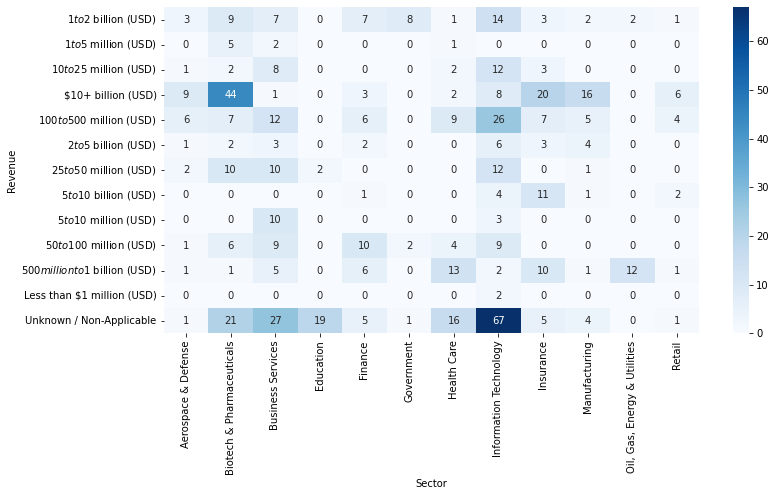

In [66]:
plt.figure(figsize=(12,6))
sns.heatmap(df_1.pivot_table(index='Revenue',columns='Sector',values='Rating',aggfunc=len,margins=False,fill_value=0),annot=True,cmap='Blues')

- จาก dataset ชุดนี้ พบว่าบริษัทที่รายได้มากกว่า 10000 ล้านดอลล่าห์ ส่วนใหญ่จะเป็น sector พวก Biotech&Phar.. อาจเป็นเพราะเนื่องจากข้อมูลชุดนี้ scrap มาในปี 2021 ซึ่งเป็นช่วง covid-19 ระบาด ทำให้บริษัทที่ผลิตยาและวัคซีนมีรายได้มาก

--

อายุเฉลี่ยของบริษัทในแต่ละ sector

<AxesSubplot:xlabel='Age', ylabel='Sector'>

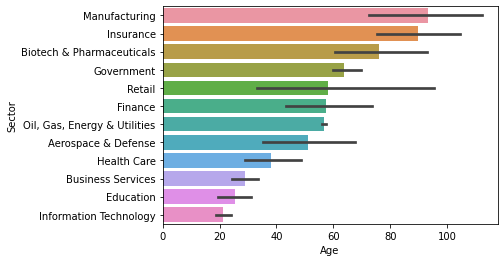

In [67]:
sector_order = df_1.groupby('Sector')['Age'].mean().sort_values(ascending=False).index
sns.barplot(y='Sector',x='Age',data=df_1,estimator=np.mean,order=sector_order)

- พบว่าบริษัทที่มีอายุเก่าแก่จะเป็นเกี่ยวกับ manufaturing และพบว่าบริษัทที่พึ่งก่อตั้งจะเป็นพวก Information technology ซึ่งก็เป็นไปตาม commonsense เนื่องจาก technology firm พึ่งเริ่มเข้ามามีบทบาทในธุรกิจ เช่น google facebook youtube

--

tools require ในแต่ละ Job_title

<AxesSubplot:ylabel='job_title_sim'>

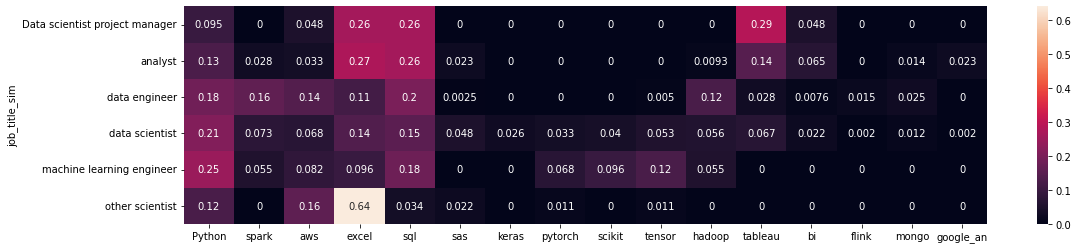

In [32]:
skill_labels = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch',
                'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']

divide_skill = []
for i in df_1.groupby('job_title_sim')[skill_labels].sum().sum(axis=1).values:
    for j in range(0,16):
        divide_skill.append(i)

skills_by_title_ratio = df_1.groupby('job_title_sim')[skill_labels].sum() / np.array(divide_skill).reshape(6,16)
plt.figure(figsize=(18,4))
sns.heatmap(skills_by_title_ratio,annot=True)

require tools (รวมทุก job title)

<AxesSubplot:>

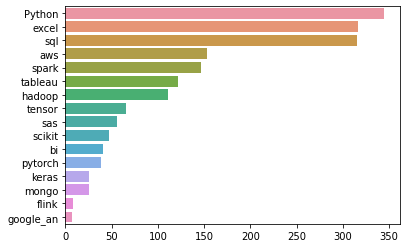

In [72]:
tool_require = df_1[skill_labels].sum().sort_values(ascending=False)
sns.barplot(y=tool_require.index,x=tool_require.values)

#### 3.2 Explore data (about avg salary)

ช่วงของเงินเดือน

count    742.00
mean     100.63
std       38.86
min       13.50
25%       73.50
50%       97.50
75%      122.50
max      254.00
Name: avg_salary (K), dtype: float64

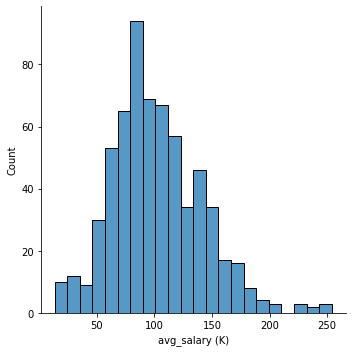

In [21]:
sns.displot(x='avg_salary (K)',data=df_1)
np.round(df['avg_salary (K)'].describe(),2)

- ช่วงเงินเดือนส่วนใหญ่อยู่ที่ 80K - 110K

--

เงินเดือนเฉลี่ยในแต่ละอุตสาหกรรม

Information Technology          165
Biotech & Pharmaceuticals       107
Business Services                94
Insurance                        62
Health Care                      48
Finance                          40
Manufacturing                    34
Aerospace & Defense              25
Education                        21
Retail                           15
Oil, Gas, Energy & Utilities     14
Government                       11
Name: Sector, dtype: int64

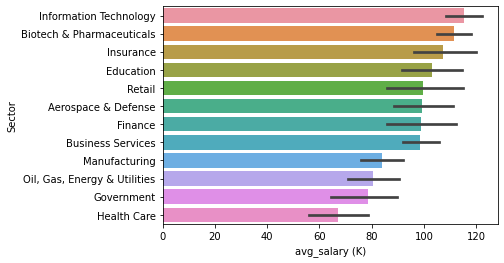

In [26]:
sector_order_salary = df_1.groupby('Sector')['avg_salary (K)'].mean().sort_values(ascending=False).index
sns.barplot(y='Sector',x='avg_salary (K)',data=df_1,order=sector_order_salary)
df_1['Sector'].value_counts()

- พบว่าเงินเดือนเฉลี่ยของอุตสาหกรรม IT (เฉลี่ยจาก 165 ตำแหน่ง) มากสุดซึ่งประมาณ 110K และน้อยสุดคือ HealthCare (เฉลี่ยจาก 48 ตำแหน่ง) ซึ่งประมาณ 70K

--

เงินเดือนเฉลี่ยในแต่ละ Job title

<AxesSubplot:xlabel='avg_salary (K)', ylabel='job_title_sim'>

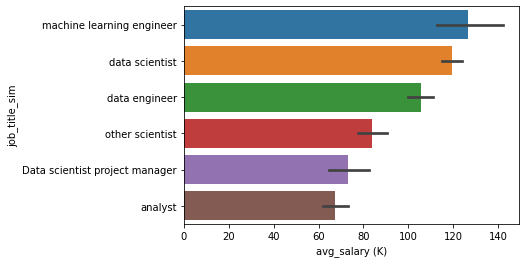

In [28]:
sns.barplot(y='job_title_sim',x='avg_salary (K)',data=df_1,order=df_1.groupby('job_title_sim')['avg_salary (K)'].mean().sort_values(ascending=False).index)

- พบว่าตำแหน่ง machine learning engineer มีเงินเดือนเฉลี่ยมากสุด อาจเนื่องจากมีการใช้ tools ที่หลากหลายว่าตำแหน่งอื่นๆ เช่น tensor

--

เงินเดือนเฉลี่ยในแต่ละขนาดบริษัท

<AxesSubplot:xlabel='avg_salary (K)', ylabel='Size'>

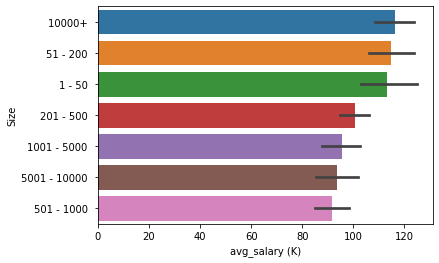

In [30]:
sns.barplot(y='Size',x='avg_salary (K)',data=df_1,order=df_1.groupby('Size')['avg_salary (K)'].mean().sort_values(ascending=False).index)

- พบว่าบริษัทที่มีเงินเดือนเฉลี่ยมากคือ Size 10000+ อาจเนื่องจากเป็นบริษัทใหญ่ มีความมั่นคงในรายได้เพียงพอที่จะจ่ายให้พนักงาน 
- และ Size 1 - 200 ก็มีเงินเดือนเฉลี่ยมากเช่นกัน อาจเป็นเพราะบริษัทคนยังน้อย เลยสามารถจ่ายได้เยอะ

--

เงินเดือนเฉลี่ยในแต่ละ require tools

<AxesSubplot:>

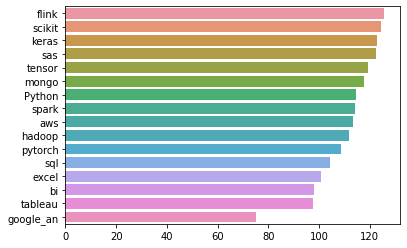

In [37]:
mean_skill_list = []
for i in skill_labels:
    mean_skill_list.append(df_1[df_1[i] == 1].groupby(i)['avg_salary (K)'].mean())
pd_mean_each_tool = pd.concat(mean_skill_list)
pd_mean_each_tool.index = skill_labels
sns.barplot(y=pd_mean_each_tool.index,x=pd_mean_each_tool.values,order=pd_mean_each_tool.sort_values(ascending=False).index)

- ตำแหน่งที่ใช้ tools พวกเกี่ยวกับ deep learning / machine learning จะมีเงินเดือนเฉลี่ยที่สูง ซึ่งสอดคล้องกับ machine learning engineer / data sci ที่ได้เงินเดือนสูง

---